<a href="https://colab.research.google.com/github/Sanu-Satheesh/My-thesis-cobot-vision/blob/main/White_Fixture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ✅ Install from scratch
!pip install -q ultralytics roboflow
!yolo checks


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 112.4 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.186 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
Setup complete ✅ (12 CPUs, 53.0 GB RAM, 39.2/235.7 GB disk)

OS                     Linux-6.1.123+-x86_64-with-glibc2.35
Environment      

In [ ]:
# ✅ Imports
from roboflow import Roboflow
from ultralytics import YOLO
import os


In [ ]:
# ✅ Download dataset to a fixed folder


rf = Roboflow(api_key="8UUjz5W4aTRdbpOPgmr8")
project = rf.workspace("mycobot-iofsj").project("white-fixture-omeck")
version = project.version(3)

# ✅ Download dataset to a fixed folder
dataset = version.download("yolov8", location="/content/white_fixture_ds")

DATA_YAML = "/content/white_fixture_ds/data.yaml"
print("YAML exists:", os.path.exists(DATA_YAML))  # should be True


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/white_fixture_ds in yolov8:: 100%|██████████| 5162/5162 [00:00<00:00, 9243.82it/s] 

YAML exists: True


In [ ]:
model = YOLO("yolov8l.pt")
results = model.train(
    data=DATA_YAML,
    epochs=100,
    imgsz=640,
    batch=-1,                 # optional: auto-tune batch
    device=0,
    name="white_fixture_yolov8_run",
    project="lego_project_yolo",
    exist_ok=True,
    workers=2,
    patience=50,
    cos_lr=True,
    optimizer="AdamW",
    # amp=False,              # optional: remove to use faster mixed precision
    fliplr=0.0,               # optional: no horizontal flip augmentation
)


Ultralytics 8.3.186 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/white_fixture_ds/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.0, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=white_fixture_yolov8_run, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=50, perspective=0.0, plots=True

Step 0 — Set your paths

In [ ]:
# Step 0 — paths for your case
BEST_WEIGHTS = "/content/lego_project_yolo/white_fixture_yolov8_run/weights/best.pt"
DATA_YAML    = "/content/white_fixture_ds/data.yaml"
CUSTOM_IMAGES_DIR = None   # or "/content/custom_tests" if you make one

# Other configs (don’t change unless you need)
IMGSZ = 640
CONF  = 0.25
IOU   = 0.6

import os, sys, json, platform, subprocess, datetime, shutil, glob, yaml
from pathlib import Path

OUTPUT_ROOT = str(Path.cwd() / "final_artifacts")  # everything lands here
os.makedirs(OUTPUT_ROOT, exist_ok=True)
print("Artifacts will be saved to:", OUTPUT_ROOT)

weights_src = os.path.dirname(BEST_WEIGHTS)
run_dir = os.path.dirname(weights_src)  # the training run folder
print("Detected training run folder:", run_dir)



Artifacts will be saved to: /content/final_artifacts
Detected training run folder: /content/lego_project_yolo/white_fixture_yolov8_run


Step 1 — Load YOLO (confirm weights load)

In [ ]:
from ultralytics import YOLO

model = YOLO(BEST_WEIGHTS)
print("Loaded weights:", BEST_WEIGHTS)


Loaded weights: /content/lego_project_yolo/white_fixture_yolov8_run/weights/best.pt


Step 2 — Validate to generate plots & metrics

In [ ]:
val_dir = os.path.join(OUTPUT_ROOT, "val")

val_res = model.val(
    data=DATA_YAML,
    imgsz=IMGSZ,
    conf=CONF,
    iou=IOU,
    plots=True,        # confusion matrix, PR/F1/P/R curves, labels.jpg
    save_json=True,    # COCO-style results
    save_txt=True,     # per-image predictions
    project=OUTPUT_ROOT,
    name="val",
    device=0
)

# Save numeric metrics to JSON (handy for thesis appendix)
metrics_json = os.path.join(val_dir, "metrics_summary.json")
try:
    m = getattr(val_res, "metrics", None)
    if m and hasattr(m, "results_dict"):
        with open(metrics_json, "w") as f:
            json.dump(m.results_dict, f, indent=2)
        print("Saved metrics summary:", metrics_json)
except Exception as e:
    print("Metrics summary not saved:", e)

print("Validation artifacts in:", val_dir)


Ultralytics 8.3.186 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 112 layers, 43,612,005 parameters, 0 gradients, 164.8 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1343.5±442.5 MB/s, size: 30.0 KB)
val: Scanning /content/white_fixture_ds/valid/labels.cache... 213 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 213/213 425827.8it/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 14/14 2.5it/s 5.6s
                   all        213       1007      0.988      0.977      0.982      0.942
           drum_roller        118        118          1          1      0.995      0.991
            front_tyre         95         95          1          1      0.995      0.988
                   led        212        535      0.985          1      0.993      0.916
      rear_grey_wheels        103        103          1          1      0.995       0.99
             rear_tyre        11

Step 3 — Inference on your validation images (for qualitative examples)

In [ ]:
# --- VAL inference with smart path probing (do NOT edit data.yaml) ---
import os, yaml
from pathlib import Path

with open(DATA_YAML, "r") as f:
    d = yaml.safe_load(f)

val_field = d.get("val", None)
if isinstance(val_field, list) and val_field:
    val_field = val_field[0]
if not val_field:
    raise ValueError("data.yaml has no 'val' entry.")

yaml_dir = Path(DATA_YAML).parent

# build candidate paths (first existing wins)
candidates = [
    (yaml_dir / val_field).resolve(),        # what your YAML says, resolved
    yaml_dir / val_field,                    # un-resolved, just in case
    yaml_dir / "valid" / "images",           # common Roboflow layout
    yaml_dir / "valid",                      # some datasets point to folder directly
]

# dedupe while keeping order
seen = set()
cand_list = []
for c in candidates:
    c = Path(c)
    if str(c) not in seen:
        cand_list.append(c)
        seen.add(str(c))

val_source = None
for c in cand_list:
    if c.exists():
        val_source = str(c)
        break

if not val_source:
    raise FileNotFoundError("Couldn't find VAL images. Tried:\n" + "\n".join(map(str, cand_list)))

print("Using VAL source:", val_source)

pred_val = model.predict(
    source=val_source,
    imgsz=IMGSZ,
    conf=CONF,
    iou=IOU,
    save=True,
    save_txt=True,
    save_conf=True,
    project=OUTPUT_ROOT,
    name="inference_val",
    device=0
)
print("VAL inference saved to:", os.path.join(OUTPUT_ROOT, "inference_val"))


Using VAL source: /content/white_fixture_ds/valid/images

image 1/213 /content/white_fixture_ds/valid/images/C1-v1-02_jpg.rf.9da78a704d2e5455a54761a76f9ec314.jpg: 640x640 1 front_tyre, 1 led, 1 rear_grey_wheels, 11.7ms
image 2/213 /content/white_fixture_ds/valid/images/C1-v1-08_jpg.rf.3f638c7cdf34475a792dce45dcfacff2.jpg: 640x640 1 front_tyre, 1 led, 1 rear_grey_wheels, 11.0ms
image 3/213 /content/white_fixture_ds/valid/images/C1-v1-13_jpg.rf.6f8261f6e41e2851596e5d4083fa61b4.jpg: 640x640 1 front_tyre, 1 led, 1 rear_grey_wheels, 10.7ms
image 4/213 /content/white_fixture_ds/valid/images/C1-v1-16_jpg.rf.8cd879d1694ac0b5d7a74f1bede6c123.jpg: 640x640 1 front_tyre, 1 led, 1 rear_grey_wheels, 1 seat_single, 10.5ms
image 5/213 /content/white_fixture_ds/valid/images/C1-v1-18_jpg.rf.8c9be69c4d6bb4ea1c4125379efb5c46.jpg: 640x640 1 front_tyre, 1 led, 1 rear_grey_wheels, 1 seat_single, 10.2ms
image 6/213 /content/white_fixture_ds/valid/images/C1-v1-29_jpg.rf.43e6c755dcae6cd14340c75e84a7ed93.jpg: 64

Step 5 — Export portable model formats (ONNX + TorchScript)

In [ ]:
exports_dir = os.path.join(OUTPUT_ROOT, "exports")
os.makedirs(exports_dir, exist_ok=True)

onnx_path = model.export(format="onnx", imgsz=IMGSZ, opset=12, dynamic=True, simplify=True, half=False)
ts_path   = model.export(format="torchscript", imgsz=IMGSZ)

for p in [onnx_path, ts_path]:
    if p and os.path.exists(p):
        shutil.copy2(p, exports_dir)

print("Exports copied to:", exports_dir)


Ultralytics 8.3.186 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from '/content/lego_project_yolo/white_fixture_yolov8_run/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 11, 8400) (83.6 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.59', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 4.4s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 12...
ONNX: slimming with onnxslim 0.1.65...
ONNX: export success ✅ 9.6s, saved as '/content/lego_project_yolo/white_fixture_yolov8_run/weights/best.onnx' (166.6 MB)

Export complete (10.8s)
Results saved to /content/lego_project_yolo/white_fixture_yolov8_run/weights
Predict:         yolo

Step 6 — Snapshot the software environment (for reproducibility)

In [ ]:
env_txt = os.path.join(OUTPUT_ROOT, "environment.txt")
reqs    = os.path.join(OUTPUT_ROOT, "requirements.txt")

with open(env_txt, "w") as f:
    f.write(f"Timestamp: {datetime.datetime.utcnow().isoformat()}Z\n")
    f.write(f"Python: {sys.version}\n")
    try:
        import torch, ultralytics
        f.write(f"Torch: {torch.__version__}\n")
        f.write(f"CUDA available: {torch.cuda.is_available()}\n")
        f.write(f"GPU: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'CPU'}\n")
        f.write(f"Ultralytics: {ultralytics.__version__}\n")
    except Exception as e:
        f.write(f"(env probe error) {e}\n")
    f.write(f"OS: {platform.platform()}\n")

# Exact package list
freeze = subprocess.run([sys.executable, "-m", "pip", "freeze"], capture_output=True, text=True)
with open(reqs, "w") as f:
    f.write(freeze.stdout)

print("Saved:", env_txt, "\nSaved:", reqs)


Saved: /content/final_artifacts/environment.txt 
Saved: /content/final_artifacts/requirements.txt


Step 7 — Collect everything into a single “thesis pack” folder

In [ ]:
pack = os.path.join(OUTPUT_ROOT, "pack")
os.makedirs(pack, exist_ok=True)

def safe_copy(src, dst_dir):
    if os.path.exists(src):
        shutil.copy2(src, os.path.join(dst_dir, os.path.basename(src)))

# 7a) Weights (best + last if available)
for name in ["best.pt", "last.pt"]:
    p = os.path.join(weights_src, name)
    if os.path.exists(p):
        safe_copy(p, pack)

# 7b) Training artifacts from the run folder (results, args)
for fn in ["results.png", "results.csv", "args.yaml", "hyp.yaml", "opt.yaml"]:
    p = os.path.join(run_dir, fn)
    if os.path.exists(p):
        safe_copy(p, pack)

# 7c) Validation plots & metrics
for fn in ["confusion_matrix.png","F1_curve.png","P_curve.png","R_curve.png","PR_curve.png","labels.jpg","metrics_summary.json","results.csv","results.png"]:
    p = os.path.join(val_dir, fn)
    if os.path.exists(p):
        safe_copy(p, pack)

# 7d) Validation predicted labels (txts)
val_labels = os.path.join(val_dir, "labels")
if os.path.exists(val_labels):
    shutil.copytree(val_labels, os.path.join(pack, "val_labels"), dirs_exist_ok=True)

# 7e) Inference images (annotated)
for name in ["inference_val", "inference_custom"]:
    d = os.path.join(OUTPUT_ROOT, name)
    pred_dir = os.path.join(d, "predict")
    if os.path.exists(pred_dir):
        shutil.copytree(pred_dir, os.path.join(pack, name), dirs_exist_ok=True)

# 7f) Exports + environment + data.yaml
shutil.copytree(exports_dir, os.path.join(pack, "exports"), dirs_exist_ok=True)
safe_copy(env_txt, pack)
safe_copy(reqs, pack)
if os.path.exists(DATA_YAML):
    safe_copy(DATA_YAML, pack)

print("Packed thesis artifacts in:", pack)


Packed thesis artifacts in: /content/final_artifacts/pack


Step 8 — Zip it (easy to back up/upload)

In [ ]:
zip_path = shutil.make_archive(OUTPUT_ROOT.rstrip(os.sep) + "_thesis_artifacts", "zip", OUTPUT_ROOT)
print("ZIP created:", zip_path)


ZIP created: /content/final_artifacts_thesis_artifacts.zip


Step 9 — (Optional) Quick sanity check of the pack

In [ ]:
for root, dirs, files in os.walk(pack):
    level = root.replace(pack, "").count(os.sep)
    indent = "  " * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = "  " * (level + 1)
    for f in files[:10]:  # show up to 10 files per folder
        print(f"{subindent}{f}")


pack/
  data.yaml
  results.csv
  args.yaml
  requirements.txt
  confusion_matrix.png
  results.png
  last.pt
  environment.txt
  best.pt
  exports/
    best.onnx
    best.torchscript
  val_labels/
    C2-v2-69_jpg.rf.b443035c235e4c1d0f703622b8671e89.txt
    C1-v3-18_jpg.rf.c3f663db18c808dfdda0f7fc100f0ec2.txt
    C3-v4-13_jpg.rf.9696737472619eb5642e1a0d3da256d5.txt
    C1-v2-22_jpg.rf.3a358a4f3d396dcd2f8134c8e1f4769a.txt
    C2-v1-24_jpg.rf.73ac1b020ac079dff84dee86d9e5642f.txt
    C1-v1-38_jpg.rf.f1f3164fb5e17151e7060b08945e2b3b.txt
    C2-v4-48_jpg.rf.fea17ebfe4310306ac67835a94e78071.txt
    C4-v2-17_jpg.rf.10237cce1ff55f0066a9e6ebbdec596f.txt
    C2-v4-39_jpg.rf.2999dfe594e6139ab2e92e36dba29649.txt
    C4-v1-46_jpg.rf.79f910fe8dd26023acb1546b3c7f19ed.txt


Ultralytics 8.3.186 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1340.4±435.0 MB/s, size: 26.7 KB)
val: Scanning /content/white_fixture_ds/valid/labels.cache... 213 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 213/213 511676.3it/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 14/14 2.5it/s 5.6s
                   all        213       1007      0.988      0.977      0.982      0.942
           drum_roller        118        118          1          1      0.995      0.991
            front_tyre         95         95          1          1      0.995      0.988
                   led        212        535      0.985          1      0.993      0.916
      rear_grey_wheels        103        103          1          1      0.995       0.99
             rear_tyre        110        111          1      0.991      0.995      0.992
           seat_double     

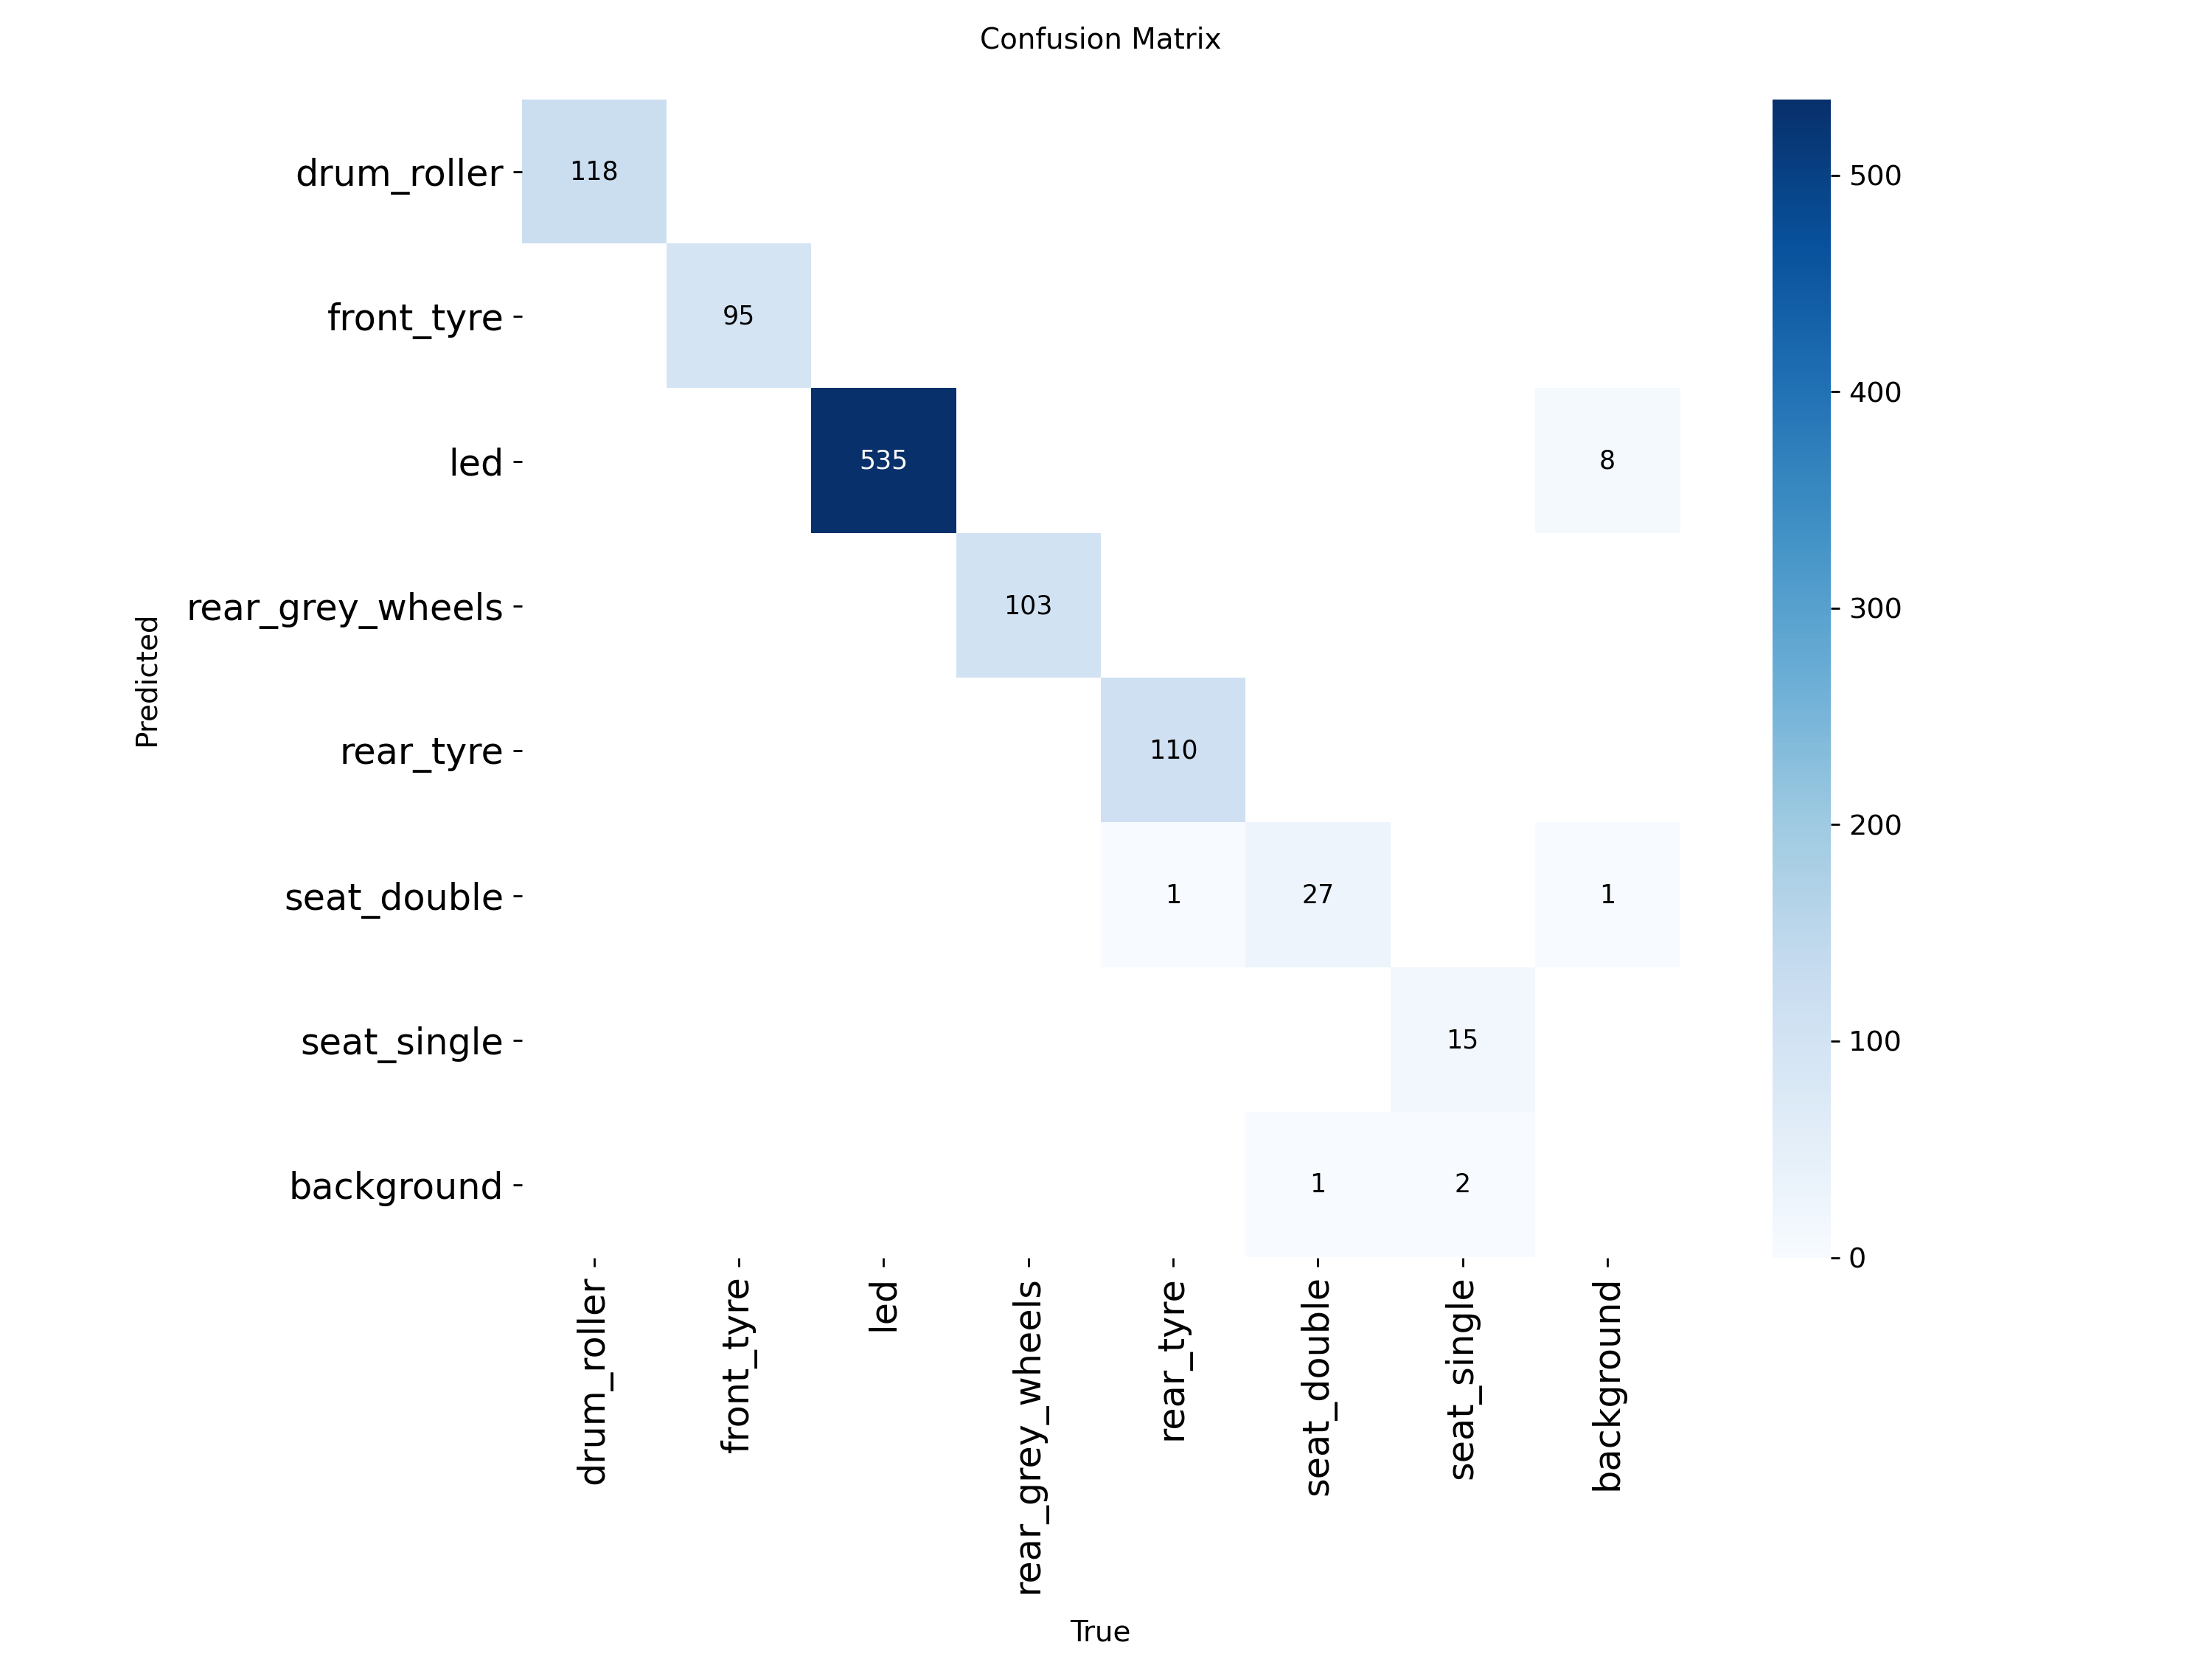

Skip val: path not found -> None

Running test inference on: /content/white_fixture_ds/test/images

image 1/106 /content/white_fixture_ds/test/images/C1-v1-06_jpg.rf.055e3e05c589f5410966c6227835637c.jpg: 640x640 1 front_tyre, 1 led, 1 rear_grey_wheels, 13.1ms
image 2/106 /content/white_fixture_ds/test/images/C1-v1-23_jpg.rf.2f6b30554dc2e6a078d9b820ab9b5b01.jpg: 640x640 1 front_tyre, 1 led, 1 rear_grey_wheels, 1 seat_single, 10.6ms
image 3/106 /content/white_fixture_ds/test/images/C1-v1-28_jpg.rf.053f68d409cb988fac816f4c6c338c38.jpg: 640x640 1 front_tyre, 1 led, 1 rear_grey_wheels, 10.3ms
image 4/106 /content/white_fixture_ds/test/images/C1-v1-37_jpg.rf.f346ca4033ca0e88014644bfefe5244e.jpg: 640x640 1 front_tyre, 1 led, 1 rear_grey_wheels, 10.3ms
image 5/106 /content/white_fixture_ds/test/images/C1-v1-45_jpg.rf.3ce7f93c62f0ca0286dd209148e8e29c.jpg: 640x640 1 front_tyre, 1 led, 1 rear_grey_wheels, 12.7ms
image 6/106 /content/white_fixture_ds/test/images/C1-v2-05_jpg.rf.ca642b7705c254ab258

In [ ]:
# === VISUAL VALIDATION + PREVIEW GALLERIES ===
import os, yaml, json, glob
from pathlib import Path
from IPython.display import display, Image

def resolve_from_yaml(yaml_path, key):
    with open(yaml_path, "r") as f:
        d = yaml.safe_load(f)
    p = d.get(key, None)
    if isinstance(p, list) and p:
        p = p[0]
    if not p:
        return None
    base = Path(yaml_path).parent
    cand = [
        (base / p).resolve(),
        base / p,
        base / key / "images",   # e.g. valid/images, test/images
        base / key,
    ]
    for c in cand:
        if Path(c).exists():
            return str(Path(c))
    return None

# ---------- 1) VALIDATE (creates plots & metrics) ----------
val_dir = os.path.join(OUTPUT_ROOT, "val")
val_res = model.val(
    data=DATA_YAML,
    imgsz=IMGSZ,
    conf=CONF,
    iou=IOU,
    plots=True,         # PR/F1/P/R curves, confusion_matrix, labels.jpg
    save_json=True,     # COCO-style JSON
    save_txt=True,      # per-image predictions
    project=OUTPUT_ROOT,
    name="val",
    device=0
)

# Save numeric metrics summary (easy to paste into thesis)
metrics_json = os.path.join(val_dir, "metrics_summary.json")
try:
    m = getattr(val_res, "metrics", None)
    if m and hasattr(m, "results_dict"):
        with open(metrics_json, "w") as f:
            json.dump(m.results_dict, f, indent=2)
        print("Key metrics:", m.results_dict)
except Exception as e:
    print("Note: couldn't save metrics summary:", e)

# Display the main validation plots inline
plots_to_show = [
    "results.png",
    "PR_curve.png",
    "F1_curve.png",
    "P_curve.png",
    "R_curve.png",
    "confusion_matrix.png",
    "labels.jpg",
]
print("\n— Validation plots —")
for fn in plots_to_show:
    p = os.path.join(val_dir, fn)
    if os.path.exists(p):
        display(Image(filename=p))

# ---------- 2) INFERENCE PREVIEWS (val + test) ----------
def run_and_show_preview(name, source_path, max_images=6):
    if not source_path or not os.path.exists(source_path):
        print(f"Skip {name}: path not found ->", source_path)
        return
    print(f"\nRunning {name} inference on:", source_path)
    pred = model.predict(
        source=source_path,
        imgsz=IMGSZ,
        conf=CONF,
        iou=IOU,
        save=True,
        save_txt=True,
        save_conf=True,
        project=OUTPUT_ROOT,
        name=f"inference_{name}",
        device=0
    )
    pred_dir = os.path.join(OUTPUT_ROOT, f"inference_{name}", "predict")
    print(f"{name} annotated images saved to:", pred_dir)

    # show a small gallery inline
    if os.path.exists(pred_dir):
        imgs = sorted(glob.glob(os.path.join(pred_dir, "*.jpg")) +
                      glob.glob(os.path.join(pred_dir, "*.png")))
        print(f"— {name} preview (showing up to {max_images}) —")
        for im in imgs[:max_images]:
            display(Image(filename=im))

val_images = resolve_from_yaml(DATA_YAML, "val")
test_images = resolve_from_yaml(DATA_YAML, "test")  # may be None if you have no test split

run_and_show_preview("val",  val_images)
run_and_show_preview("test", test_images)


In [ ]:
# Re-run inference on VAL and TEST with forced save of annotated images
import os

# Validation images
val_source = "/content/white_fixture_ds/valid/images"
pred_val = model.predict(
    source=val_source,
    imgsz=IMGSZ,
    conf=CONF,
    iou=IOU,
    save=True,
    save_txt=True,
    save_conf=True,
    project=OUTPUT_ROOT,
    name="inference_val",   # same name -> will update the folder
    exist_ok=True,          # overwrite existing
    device=0,
    visualize=True          # <--- force visualization output
)

# Test images
test_source = "/content/white_fixture_ds/test/images"
if os.path.exists(test_source):
    pred_test = model.predict(
        source=test_source,
        imgsz=IMGSZ,
        conf=CONF,
        iou=IOU,
        save=True,
        save_txt=True,
        save_conf=True,
        project=OUTPUT_ROOT,
        name="inference_test",
        exist_ok=True,
        device=0,
        visualize=True
    )



Saving /content/final_artifacts/inference_val/C1-v1-02_jpg.rf.9da78a704d2e5455a54761a76f9ec314/stage0_Conv_features.png... (32/64)
Saving /content/final_artifacts/inference_val/C1-v1-02_jpg.rf.9da78a704d2e5455a54761a76f9ec314/stage1_Conv_features.png... (32/128)
Saving /content/final_artifacts/inference_val/C1-v1-02_jpg.rf.9da78a704d2e5455a54761a76f9ec314/stage2_C2f_features.png... (32/128)
Saving /content/final_artifacts/inference_val/C1-v1-02_jpg.rf.9da78a704d2e5455a54761a76f9ec314/stage3_Conv_features.png... (32/256)
Saving /content/final_artifacts/inference_val/C1-v1-02_jpg.rf.9da78a704d2e5455a54761a76f9ec314/stage4_C2f_features.png... (32/256)
Saving /content/final_artifacts/inference_val/C1-v1-02_jpg.rf.9da78a704d2e5455a54761a76f9ec314/stage5_Conv_features.png... (32/512)
Saving /content/final_artifacts/inference_val/C1-v1-02_jpg.rf.9da78a704d2e5455a54761a76f9ec314/stage6_C2f_features.png... (32/512)
Saving /content/final_artifacts/inference_val/C1-v1-02_jpg.rf.9da78a704d2e5455a